<a href="https://colab.research.google.com/github/Shahanashirin-k/CREDIT_CARD-FRAUD_DETECTION/blob/main/CCFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD TRANSACTION

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import all the required library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset from Google Drive
df_C = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/creditcard.csv')

In [ ]:
print(df_C.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## PRE-PROCESSING

### **EDA**

In [ ]:
df_C.shape

(284807, 31)

In [ ]:
df_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df_C.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df_C.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**It means that it doesn't have missing values**

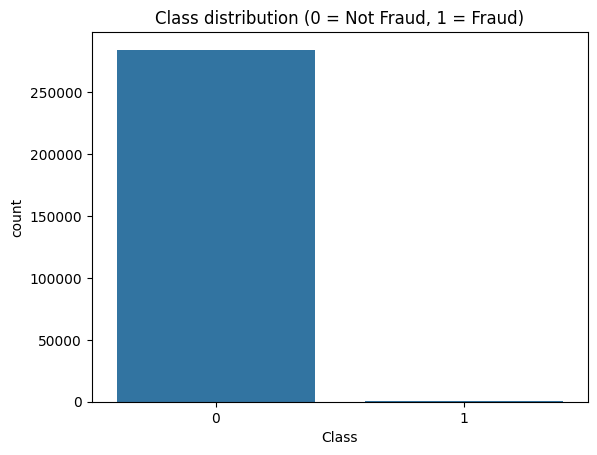

In [ ]:
sns.countplot(x='Class', data=df_C)
plt.title('Class distribution (0 = Not Fraud, 1 = Fraud)')
plt.show()

As all the features from V1 to V28 are already normalized, so we just have to normalize the Amount

In [ ]:
df_C.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Percentage of fraud cases'
fraud_percentage = df_C['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [ ]:
#Seperating based on Class analysis
Actual= df_C[df_C.Class==0]
Actual.shape

(284315, 31)

In [ ]:
Fraud= df_C[df_C.Class==1]
Fraud.shape

(492, 31)

seperating the data based on the Amount

In [ ]:
#Seperating the data based on the amount wise analysis
Actual.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
Fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000




*   The mean for non-fraudulent transactions is close to zero (-0.000234).
*   The mean for fraudulent transactions is slightly higher (0.135382), indicating that the normalized transaction amounts for fraud might generally be a bit higher on average than non-fraud.






# FEATURE ENGINEERING

Based on Time

In [ ]:
print(df_C['Time'].head(10))
print(df_C['Time'].describe())

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
6    4.0
7    7.0
8    7.0
9    9.0
Name: Time, dtype: float64
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Time' is in seconds
df_C['Day'] = df_C['Time'] // (24 * 60 * 60)  # Total days
temp = df_C['Time'] % (24 * 60 * 60)
df_C['Hour'] = temp // (60 * 60)  # Hour of the day
temp = temp % (60 * 60)
df_C['Minute'] = temp // 60  # Minute of the hour
df_C['Second'] = temp % 60  # Second of the minute
# Print the resulting columns
print(df_C[['Hour', 'Day', 'Minute', 'Second']].head())

   Hour  Day  Minute  Second
0   0.0  0.0     0.0     0.0
1   0.0  0.0     0.0     0.0
2   0.0  0.0     0.0     1.0
3   0.0  0.0     0.0     1.0
4   0.0  0.0     0.0     2.0


<Axes: title={'center': 'Fraudulent Transactions by Hour'}, xlabel='Hour'>

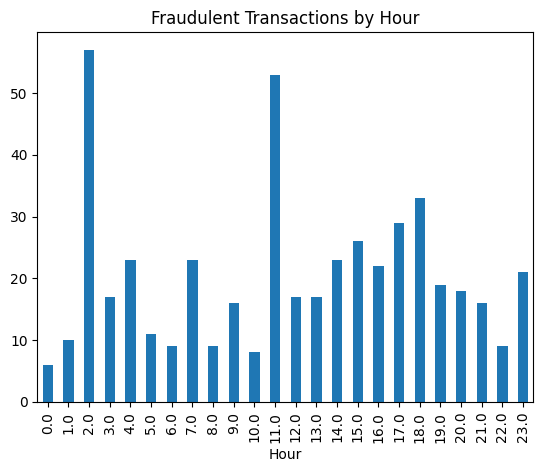

In [ ]:
hourly_fraud_analysis = df_C[df_C['Class'] == 1].groupby('Hour').size()
hourly_fraud_analysis.plot(kind='bar', title='Fraudulent Transactions by Hour')



Based on Amount

In [ ]:
amount_skewness = df_C['Amount'].skew()
time_skewness = df_C['Time'].skew()

print(f'Skewness of Amount: {amount_skewness}')
print(f'Skewness of Time: {time_skewness}')

Skewness of Amount: 16.977724453761024
Skewness of Time: -0.0355676180063216


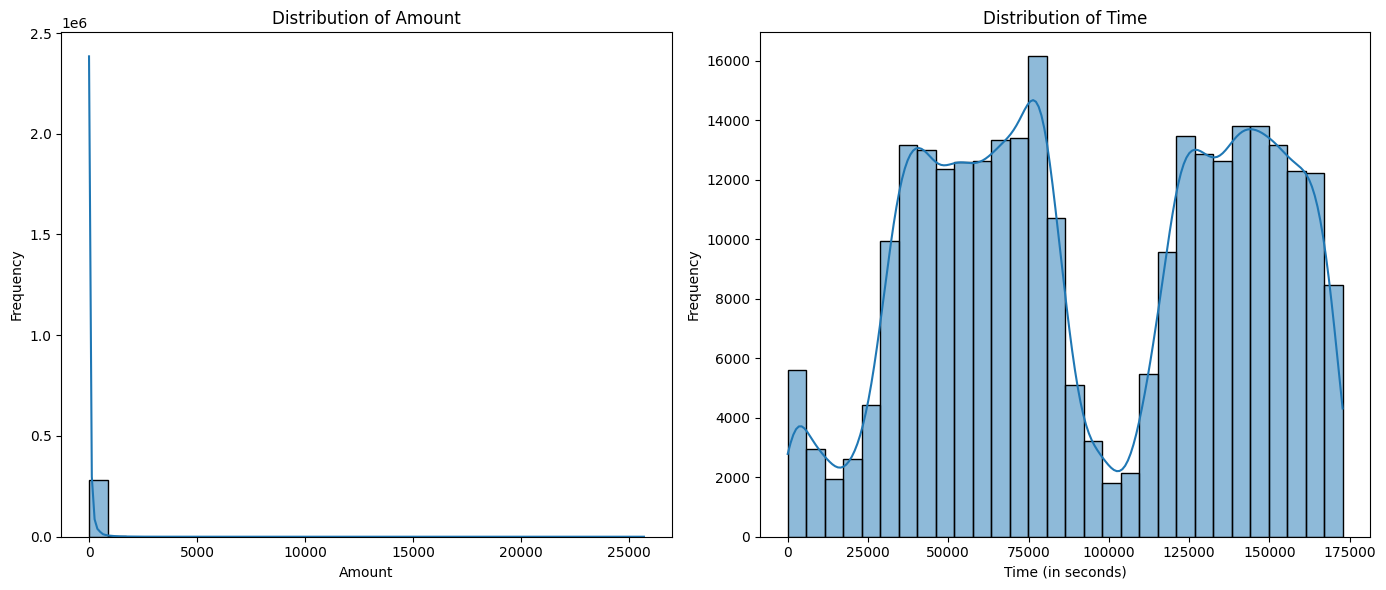

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 6))

# Histogram for Amount
plt.subplot(1, 2, 1)
sns.histplot(df_C['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Histogram for Time
plt.subplot(1, 2, 2)
sns.histplot(df_C['Time'], bins=30, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
df_C['Log_Amount'] = np.log1p(df_C['Amount'])

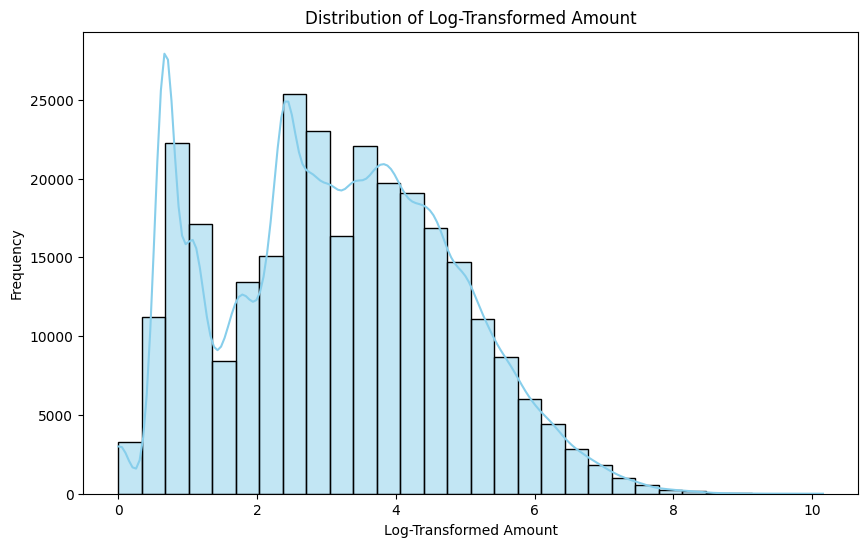

In [ ]:
# Plot the distribution of the log-transformed 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df_C['Log_Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed Amount')
plt.xlabel('Log-Transformed Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Categorize amount into bins
df_C['Amount_Category'] = pd.cut(df_C['Amount'], bins=[-1, 100, 1000, 10000, np.inf], labels=['Very Low', 'Low', 'Medium', 'High'])


In [ ]:
# Filter and print rows with Amount_Category of 'Medium' or 'High'
filtered_df = df_C[df_C['Amount_Category'].isin(['Medium', 'High'])]
print(filtered_df[['Amount', 'Amount_Category']])


          Amount Amount_Category
51       1402.95          Medium
89       1142.02          Medium
164      3828.04          Medium
633      1015.61          Medium
865      1602.99          Medium
...          ...             ...
283875   1026.46          Medium
284154   1088.04          Medium
284249  10199.44            High
284383   1114.00          Medium
284497   1484.66          Medium

[2940 rows x 2 columns]


In [ ]:
# Final DataFrame with engineered features
df_engineered = df_C[['Time', 'Amount', 'Log_Amount','Hour', 'Day', 'Amount_Category', 'Class']]
df_engineered.head()


,Time,Amount,Log_Amount,Hour,Day,Amount_Category,Class
0,0.0,149.62,5.014760,0.0,0.0,Low,0
1,0.0,2.69,1.305626,0.0,0.0,Very Low,0
2,1.0,378.66,5.939276,0.0,0.0,Low,0
3,1.0,123.50,4.824306,0.0,0.0,Low,0
4,2.0,69.99,4.262539,0.0,0.0,Very Low,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_engineered['Amount_Category'] = label_encoder.fit_transform(df_engineered['Amount_Category'])


### Balencing the data using SMOTE

Using Undersampling Method

In [ ]:
x = df_engineered.drop(columns= "Class", axis = 1)

In [ ]:
y = df_engineered.Class

**Splitting the data into Train data and Test data**

Splitting the data into 70% for training set and 30% of the data for test set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 40,stratify=y)

In [ ]:
# Print the shape of the training and testing data
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (227845, 6) (227845,)
Testing set shape: (56962, 6) (56962,)


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=40)

# Apply SMOTE only on the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Print the new shape of x_train and y_train after SMOTE
print("Training set after SMOTE - Features shape:", x_train_smote.shape)
print("Training set after SMOTE - Target shape:", y_train_smote.shape)

# Verify the distribution of classes after SMOTE
print("Class distribution in y_train after SMOTE:\n", y_train_smote.value_counts())

Training set after SMOTE - Features shape: (454902, 6)
Training set after SMOTE - Target shape: (454902,)
Class distribution in y_train after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
import plotly.graph_objects as go

# Count the number of authentic and fraudulent samples in the SMOTE-applied training set
values_smote = [y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]
labels = ['Authentic', 'Fraudulent']

# Plotting the balanced distribution after SMOTE
fig = go.Figure(data=[go.Pie(values=values_smote, labels=labels, hole=0.5, textinfo='percent')])

fig.update_layout(
    title_text="Distribution of Authentic and Fraudulent Transactions After SMOTE (Training Set)",
    width=600,  # Width of the figure
    height=600  # Height of the figure
)

# Display the plot
fig.show()

In [ ]:
print(len(x_train_smote))
print(len(x_test))
print(len(y_train_smote))
print(len(x_test))

454902
56962
454902
56962


It means that SMOTE has balanced the dataset by oversampling the minority class (fraudulent transactions) in the training set to match the majority class count. Now both classes have an equal number of samples, summing to a total of 454,900 samples in the training set.

 SMOTE is only applied to the training set to avoid data leakage, so the test set remains at its original 20% split of the full dataset.



*   Our training set is now balanced, which should help improve model performance by providing it with an equal number of fraudulent and authentic transactions during training.
*   The test set still has the original class imbalance, which is what you want. This way, you can evaluate the model on an imbalanced dataset to see how well it generalizes.



In [ ]:
from scipy.stats import skew

# Checking skewness of each feature in the training set
for column in x_train_smote.columns:
    print(f"{column}: {skew(x_train_smote[column])}")


Time: 0.08380781352637404
Amount: 16.208395431247023
Log_Amount: 0.19157403542152224
Hour: -0.3081558709885156
Day: 0.14822666358681583
Amount_Category: -1.0994805169043997


# **MODEL SELECTION**

## USING ML MODELS